In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Documents\TimeSeriesProject\BAJAJFINSV.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
data=df.set_index('Date')

In [5]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [6]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [7]:
data.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [8]:
data.shape

(3201, 14)

In [9]:
data[data['Trades'].isna()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-25,BAJAJFINSV,EQ,490.50,485.00,498.50,485.00,489.00,485.95,491.58,68329,3.358895e+12,NaN,17938,0.2625
2011-05-26,BAJAJFINSV,EQ,485.95,489.90,491.40,482.20,485.40,484.70,486.95,27605,1.344235e+12,NaN,8579,0.3108
2011-05-27,BAJAJFINSV,EQ,484.70,485.65,492.00,484.05,486.30,486.90,487.88,35212,1.717919e+12,NaN,11239,0.3192


In [10]:
dataframe=data.drop(columns='Trades',axis=1)

In [11]:
dataframe.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,462832,0.1514


In [12]:
dataframe.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [13]:
dataframe.duplicated().value_counts()

False    3201
Name: count, dtype: int64

In [14]:
dataframe.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [15]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

<Axes: xlabel='Date'>

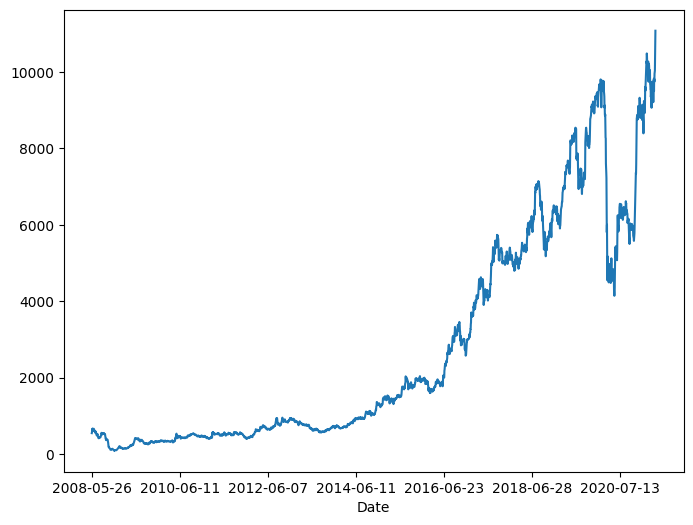

In [16]:
data['VWAP'].plot(figsize=(8,6))

<Axes: xlabel='VWAP', ylabel='Count'>

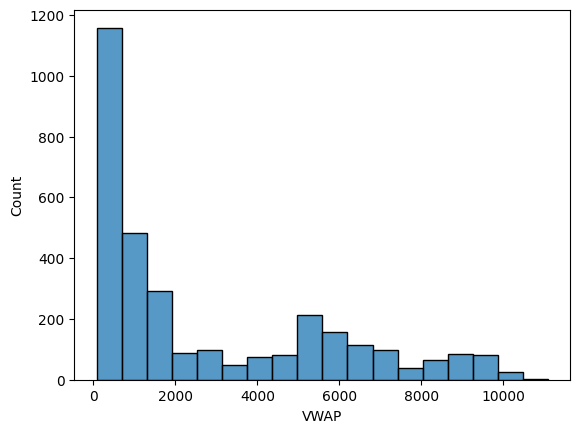

In [17]:
sns.histplot(data=dataframe,x='VWAP')

<Axes: xlabel='VWAP', ylabel='Density'>

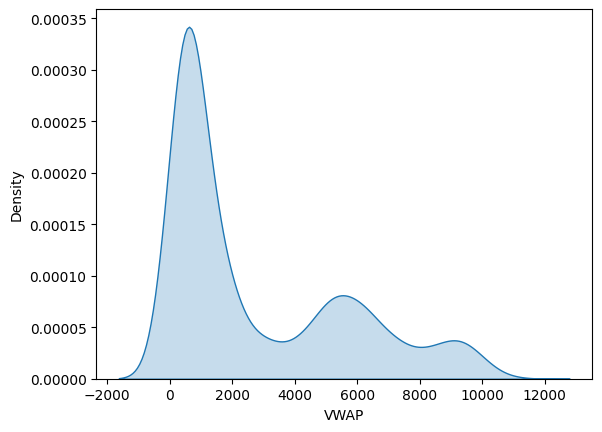

In [18]:
sns.kdeplot(data=dataframe,x='VWAP',fill=True)

((array([-3.51908695, -3.27647555, -3.14237236, ...,  3.14237236,
          3.27647555,  3.51908695], shape=(3201,)),
  array([   89.26,    93.99,    94.79, ..., 10486.75, 10980.4 , 11081.78],
        shape=(3201,))),
 (np.float64(2583.5304104028073),
  np.float64(2761.156954076851),
  np.float64(0.8981685068494002)))

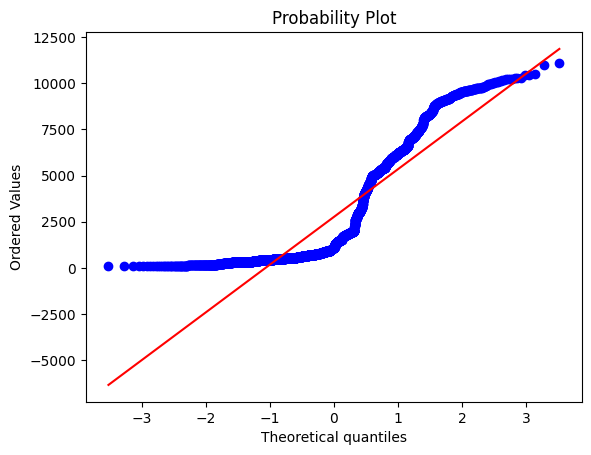

In [19]:
stats.probplot(x=dataframe['VWAP'], plot=plt)

In [20]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [21]:
col=['Open', 'High', 'Low','Close']

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

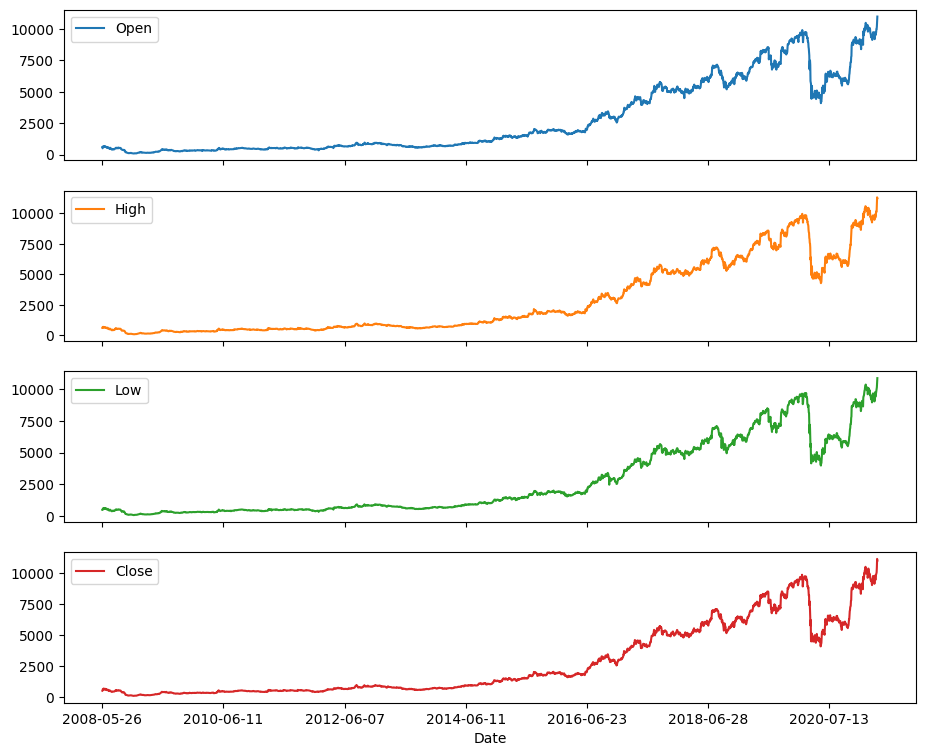

In [22]:
dataframe[col].plot(subplots=True,figsize=(11,9))

In [23]:
fig=go.Figure(data=[go.Candlestick(x=dataframe.index[0:50],
                              open=dataframe['Open'][0:50],
                              high=dataframe['High'][0:50],
                              low=dataframe['Low'][0:50],
                              close=dataframe['Close'][0:50])])

In [24]:
fig.update_layout(xaxis_rangeslider_visible=False)

In [25]:
lag_features=['High','Low','Volume','Turnover']
window1=3
window2=7

In [26]:
dataframe['High'].rolling(window=3).mean()

Date
2008-05-26             NaN
2008-05-27             NaN
2008-05-28      631.850000
2008-05-29      659.850000
2008-05-30      678.866667
                  ...     
2021-04-26    10059.766667
2021-04-27    10133.466667
2021-04-28    10291.316667
2021-04-29    10682.983333
2021-04-30    11046.983333
Name: High, Length: 3201, dtype: float64

In [27]:
for col in lag_features:
    dataframe[col+"rolling_mean_3"]=dataframe[col].rolling(window=window1).mean()
    dataframe[col+"rolling_mean_7"]=dataframe[col].rolling(window=window2).mean()

In [28]:
dataframe.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,...,908264,0.2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,...,677627,0.1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,...,774895,0.1689,631.850000,NaN,518.700000,NaN,4.027783e+06,NaN,2.350756e+14,NaN
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,...,1006161,0.2225,659.850000,NaN,554.366667,NaN,4.486735e+06,NaN,2.769607e+14,NaN
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,...,462832,0.1514,678.866667,NaN,586.766667,NaN,4.056243e+06,NaN,2.588793e+14,NaN


In [29]:
for col in lag_features:
    dataframe[col+"rolling_std_3"]=dataframe[col].rolling(window=window1).std()
    dataframe[col+"rolling_std_3"]=dataframe[col].rolling(window=window2).std()

In [30]:
dataframe.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Lowrolling_std_3,Volumerolling_std_3,Turnoverrolling_std_3
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,...,518.700000,NaN,4.027783e+06,NaN,2.350756e+14,NaN,NaN,NaN,NaN,NaN
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,...,554.366667,NaN,4.486735e+06,NaN,2.769607e+14,NaN,NaN,NaN,NaN,NaN
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,...,586.766667,NaN,4.056243e+06,NaN,2.588793e+14,NaN,NaN,NaN,NaN,NaN


In [31]:
dataframe.shape

(3201, 25)

In [32]:
dataframe.isna()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Lowrolling_std_3,Volumerolling_std_3,Turnoverrolling_std_3
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2008-05-27,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2008-05-28,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,True,True,True
2008-05-29,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,True,True,True
2008-05-30,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-04-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-04-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
dataframe.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Highrolling_std_3         6
Lowrolling_std_3          6
Volumerolling_std_3       6
Turnoverrolling_std_3     6
dtype: int64

In [34]:
dataframe.dropna(inplace=True)

In [35]:
dataframe.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Highrolling_std_3         0
Lowrolling_std_3          0
Volumerolling_std_3       0
Turnoverrolling_std_3     0
dtype: int64

In [36]:
training_data=dataframe[0:2400]
testing_data=dataframe[2400:]

In [37]:
len(training_data)

2400

In [38]:
import pmdarima
print(pmdarima.__version__)

2.0.4


In [39]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Lowrolling_std_3',
       'Volumerolling_std_3', 'Turnoverrolling_std_3'],
      dtype='object')

In [40]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Lowrolling_std_3',
       'Volumerolling_std_3', 'Turnoverrolling_std_3']

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
from pmdarima import auto_arima

In [46]:
model=auto_arima(y=training_data['VWAP'],X=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21540.854, Time=3.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22581.268, Time=2.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21998.835, Time=2.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21653.169, Time=3.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38860.006, Time=2.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21633.108, Time=3.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21610.235, Time=3.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=21541.149, Time=4.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=21536.044, Time=5.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=21546.198, Time=4.89 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=21538.519, Time=4.94 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=21533.779, Time=4.63 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=21545.113, Time=4.43 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=21532.791, Time=4.76 sec
 ARIMA(4,0,4)(0,0,0

In [48]:
model

,order,"(2, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [52]:
forecast=model.predict(n_periods=len(testing_data),X=testing_data[ind_features])

In [53]:
forecast

2400     5068.554946
2401     5066.849385
2402     5122.256684
2403     5183.677600
2404     5203.403847
            ...     
3190     9989.679551
3191    10070.273695
3192    10267.145392
3193    10721.051346
3194    11120.564019
Length: 795, dtype: float64

In [54]:
testing_data['Forecast_ARIMA']=forecast.values

In [55]:
testing_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Lowrolling_std_3,Volumerolling_std_3,Turnoverrolling_std_3,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-09,BAJAJFINSV,EQ,5057.25,4989.90,5088.0,4961.20,5068.00,5059.35,5037.19,144600,...,4826.821429,166873.666667,255094.142857,8.401559e+13,1.265139e+14,79.389987,167.521603,91750.413573,4.514870e+13,5068.554946
2018-02-12,BAJAJFINSV,EQ,5059.35,5096.30,5244.0,5042.80,5210.00,5235.45,5184.22,141176,...,4865.792857,146787.333333,225139.571429,7.493284e+13,1.122500e+14,103.400785,183.106338,89474.878072,4.375212e+13,5066.849385
2018-02-14,BAJAJFINSV,EQ,5235.45,5260.00,5350.0,5152.30,5175.00,5189.00,5272.21,154547,...,4903.128571,146774.333333,193623.428571,7.583563e+13,9.691195e+13,142.107292,213.253902,62661.570046,2.863090e+13,5122.256684
2018-02-15,BAJAJFINSV,EQ,5189.00,5200.00,5291.0,5112.05,5134.00,5130.35,5197.04,104197,...,4952.985714,133306.666667,166231.571429,6.960694e+13,8.393934e+13,141.943483,215.827622,51372.889474,2.331018e+13,5183.677600
2018-02-16,BAJAJFINSV,EQ,5130.35,5168.85,5199.8,5030.00,5055.55,5058.25,5089.32,88468,...,5028.700000,115737.333333,141287.000000,6.021876e+13,7.227025e+13,105.413408,81.747523,36848.735971,1.822208e+13,5203.403847


In [58]:
testing_data[['Forecast_ARIMA','VWAP']]

,Forecast_ARIMA,VWAP
Date,,
2018-02-09,5068.554946,5037.19
2018-02-12,5066.849385,5184.22
2018-02-14,5122.256684,5272.21
2018-02-15,5183.677600,5197.04
2018-02-16,5203.403847,5089.32
...,...,...
2021-04-26,9989.679551,9995.72
2021-04-27,10070.273695,10036.76
2021-04-28,10267.145392,10445.96


<Axes: xlabel='Date'>

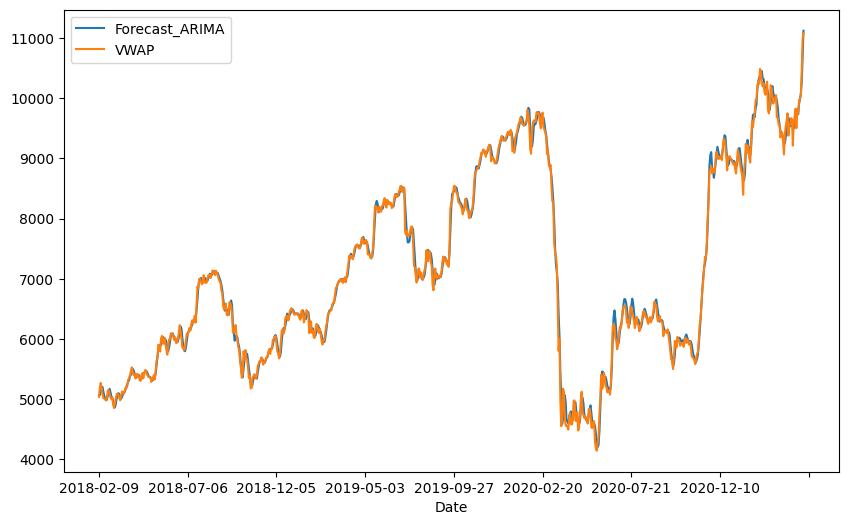

In [60]:
testing_data[['Forecast_ARIMA','VWAP']].plot(figsize=(10,6))

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
mean_squared_error(testing_data['VWAP'],testing_data['Forecast_ARIMA'])

11842.096532479869

In [64]:
np.sqrt(mean_squared_error(testing_data['VWAP'],testing_data['Forecast_ARIMA']))

np.float64(108.82139740179717)

In [65]:
mean_absolute_error(testing_data['VWAP'],testing_data['Forecast_ARIMA'])

78.08460041987328